# コレスポンデンス分析

In [2]:
import pandas as pd
import numpy as np
import os
import prince  # Correspondence Analysisライブラリ
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
#=============================================
# 調査の車両数
#=============================================
num_car = 3
#=============================================
# Inputファイル情報
#=============================================
INPUT_DNAME = "Car_サンプルデータ.csv"
INPUT_folder = "2_data"        
#=============================================
# Outputファイル情報
#=============================================
OUTPUT_DNAME = "1_平均.csv"
OUTPUT_DIS = "2_行列入れ替え.csv"
OUTPUT_AVE = "3_コレポンデータ.csv"
OUTPUT_folder = "3_output"
#=============================================
# カレントパス
#=============================================
current_dpath = os.getcwd()
#=============================================
# パレントパス
#=============================================
parent_dpath =os.path.sep.join(current_dpath.split(os.path.sep)[:-1])
#=============================================
# Inputデータファイル Path
#=============================================
input_dpath =os.path.sep.join([parent_dpath + '\\' + INPUT_folder,INPUT_DNAME])
#=============================================
# Outputデータファイル Path
#=============================================
output_dpath =parent_dpath + '\\' + OUTPUT_folder

#=============================================
# Inputデータ読み込む
#=============================================
df = pd.read_csv(input_dpath,encoding='shift-JIS')


In [5]:
#=============================================
# 列名をすべて取得
#=============================================
columns= list(df.columns)

print(", ".join(columns))

ID, Car, Elegant, Luxurious, Sporty, Technology, Futuristic, Traditional, Cute, Cool, Sleek, Trendy, Car.1, Elegant.1, Luxurious.1, Sporty.1, Technology.1, Futuristic.1, Traditional.1, Cute.1, Cool.1, Sleek.1, Trendy.1, Car.2, Elegant.2, Luxurious.2, Sporty.2, Technology.2, Futuristic.2, Traditional.2, Cute.2, Cool.2, Sleek.2, Trendy.2


In [9]:
#=============================================
# Car列のデータの型を指定
#=============================================
df['Car'] = df['Car'].astype(str)
df['Car.1'] = df['Car.1'].astype(str)
df['Car.2'] = df['Car.2'].astype(str)

In [10]:

#=============================================
# # すべての "Car" で始まる列のインデックスを取得
#=============================================
car_indices = [i for i, col in enumerate(columns) if col.startswith("Car")]
#=============================================
# # データフレームの列数を末尾インデックスとして追加
#=============================================
car_indices.append(len(columns))

In [11]:
#=============================================
# "Car"で始まる列ごとに、範囲を決めて処理する
#=============================================
columns_trimmed_list = []

for idx in range(len(car_indices) - 1):
    start = car_indices[idx]
    end = car_indices[idx + 1]

    # ID列も含める（0番目）
    trimmed = [columns[0]] + columns[start:end]
    columns_trimmed_list.append(trimmed)
#=============================================
# "Car"の列だけを個別のリストにする
#=============================================
columns_trimmed_1 = columns_trimmed_list[0]
columns_trimmed_2 = columns_trimmed_list[1]
columns_trimmed_3 = columns_trimmed_list[2]
# 結果を確認
print(columns_trimmed_1)
print(columns_trimmed_2)
print(columns_trimmed_3)

['ID', 'Car', 'Elegant', 'Luxurious', 'Sporty', 'Technology', 'Futuristic', 'Traditional', 'Cute', 'Cool', 'Sleek', 'Trendy']
['ID', 'Car.1', 'Elegant.1', 'Luxurious.1', 'Sporty.1', 'Technology.1', 'Futuristic.1', 'Traditional.1', 'Cute.1', 'Cool.1', 'Sleek.1', 'Trendy.1']
['ID', 'Car.2', 'Elegant.2', 'Luxurious.2', 'Sporty.2', 'Technology.2', 'Futuristic.2', 'Traditional.2', 'Cute.2', 'Cool.2', 'Sleek.2', 'Trendy.2']


In [12]:
#=============================================
# まずは、車両数分それぞれのデータフレームに分割
#=============================================
df1 = df[columns_trimmed_1].copy()
df2 = df[columns_trimmed_2].copy()
df3 = df[columns_trimmed_3].copy()
print(df1.head(3))
print(df2.head(3))
print(df3.head(3))


   ID Car  Elegant  Luxurious  Sporty  Technology  Futuristic  Traditional  \
0   1  A車      1.0        NaN     NaN         1.0         NaN          NaN   
1   2  A車      1.0        NaN     1.0         NaN         NaN          1.0   
2   3  A車      NaN        1.0     NaN         1.0         NaN          NaN   

   Cute  Cool  Sleek  Trendy  
0   1.0   NaN    NaN     NaN  
1   NaN   NaN    NaN     NaN  
2   1.0   NaN    1.0     NaN  
   ID Car.1  Elegant.1  Luxurious.1  Sporty.1  Technology.1  Futuristic.1  \
0   1    B車        1.0          NaN       1.0           NaN           1.0   
1   2    B車        NaN          1.0       1.0           NaN           NaN   
2   3    B車        NaN          1.0       NaN           NaN           1.0   

   Traditional.1  Cute.1  Cool.1  Sleek.1  Trendy.1  
0            NaN     NaN     1.0      NaN       NaN  
1            1.0     1.0     NaN      NaN       NaN  
2            NaN     NaN     1.0      NaN       1.0  
   ID Car.2  Elegant.2  Luxurious.2  S

In [13]:
#=============================================
# まずは、車両数分それぞれのデータフレームに分割
#=============================================
df1 = df[columns_trimmed_1].copy()
df2 = df[columns_trimmed_2].copy()
df3 = df[columns_trimmed_3].copy()

#=============================================
# カラム名を統一（df2、df3の列名をdf1に合わせる）
#=============================================
df2.columns = columns_trimmed_1
df3.columns = columns_trimmed_1

#=============================================
# 縦に連結
#=============================================
df_long = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
#=============================================
#　データ確認用に出力
#=============================================
df_long.to_csv("1.csv" ,encoding='cp932',index =False)
df_long.head(3)

,ID,Car,Elegant,Luxurious,Sporty,Technology,Futuristic,Traditional,Cute,Cool,Sleek,Trendy
0,1,A車,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
1,2,A車,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,3,A車,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN


In [14]:
#=============================================
# イメージワードの開始列を指定（ID列とCar列以降の列）
#=============================================
image_cols = df_long.columns[2:]

#=============================================
# NaNを空文字に置換
#=============================================
df_long[image_cols] = df_long[image_cols].fillna('')

#=============================================
# # "1"（文字）または1（数値）を1に、それ以外は0に変換
#=============================================
df_long[image_cols] = df_long[image_cols].applymap(lambda x: 1 if x == 1 or x == '1' else 0)

df_long[image_cols] .head(3)

,Elegant,Luxurious,Sporty,Technology,Futuristic,Traditional,Cute,Cool,Sleek,Trendy
0,1,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,1,0,0,0,0
2,0,1,0,1,0,0,1,0,1,0


In [15]:
#=============================================
# Carごとにイメージワードの平均値を算出
#=============================================
df_grouped = df_long.groupby('Car')[image_cols].mean()
df_grouped

,Elegant,Luxurious,Sporty,Technology,Futuristic,Traditional,Cute,Cool,Sleek,Trendy
Car,,,,,,,,,,
A車,0.485714,0.514286,0.485714,0.342857,0.314286,0.485714,0.371429,0.542857,0.314286,0.057143
B車,0.371429,0.628571,0.600000,0.314286,0.371429,0.371429,0.371429,0.628571,0.257143,0.114286
C車,0.342857,0.600000,0.657143,0.371429,0.342857,0.457143,0.542857,0.485714,0.342857,0.057143


In [26]:
#=============================================
# Carごとにイメージワードの平均値を算出
#=============================================
df_grouped = df_long.groupby('Car')[image_cols].mean()

#=============================================
# インデックスを列に変換
#=============================================
df_grouped = df_grouped.reset_index()

#=============================================
# 集計結果をCSVファイルに出力
#=============================================            
df_grouped.to_csv(output_dpath + "\\" + OUTPUT_DNAME ,encoding='cp932',index =False)
df_grouped

,Car,Elegant,Luxurious,Sporty,Technology,Futuristic,Traditional,Cute,Cool,Sleek,Trendy
0,A車,0.485714,0.514286,0.485714,0.342857,0.314286,0.485714,0.371429,0.542857,0.314286,0.057143
1,B車,0.371429,0.628571,0.600000,0.314286,0.371429,0.371429,0.371429,0.628571,0.257143,0.114286
2,C車,0.342857,0.600000,0.657143,0.371429,0.342857,0.457143,0.542857,0.485714,0.342857,0.057143


In [24]:
#=============================================
# 行列入れ替え
#=============================================  

data = df_grouped.T
data

,0,1,2
Car,A車,B車,C車
Elegant,0.485714,0.371429,0.342857
Luxurious,0.514286,0.628571,0.6
Sporty,0.485714,0.6,0.657143
Technology,0.342857,0.314286,0.371429
Futuristic,0.314286,0.371429,0.342857
Traditional,0.485714,0.371429,0.457143
Cute,0.371429,0.371429,0.542857
Cool,0.542857,0.628571,0.485714
Sleek,0.314286,0.257143,0.342857


In [27]:
df_transposed = df_grouped.T.reset_index()

df_transposed

,index,0,1,2
0,Car,A車,B車,C車
1,Elegant,0.485714,0.371429,0.342857
2,Luxurious,0.514286,0.628571,0.6
3,Sporty,0.485714,0.6,0.657143
4,Technology,0.342857,0.314286,0.371429
5,Futuristic,0.314286,0.371429,0.342857
6,Traditional,0.485714,0.371429,0.457143
7,Cute,0.371429,0.371429,0.542857
8,Cool,0.542857,0.628571,0.485714
9,Sleek,0.314286,0.257143,0.342857


In [10]:

#=============================================
# 先頭行を車両名にする
#=============================================   
data.columns = data.iloc[0]

#=============================================
# 数値のカラム名になってる先頭行を削除
#=============================================  
data_a = data.drop(data.index[0])

#=============================================
# csvファイルに出力
#=============================================            
data_a.to_csv(output_dpath + "\\" + OUTPUT_DIS ,encoding='cp932',index =False)
data_a


Car,A車,B車,C車
Elegant,0.485714,0.371429,0.342857
Luxurious,0.514286,0.628571,0.6
Sporty,0.485714,0.6,0.657143
Technology,0.342857,0.314286,0.371429
Futuristic,0.314286,0.371429,0.342857
Traditional,0.485714,0.371429,0.457143
Cute,0.371429,0.371429,0.542857
Cool,0.542857,0.628571,0.485714
Sleek,0.314286,0.257143,0.342857
Trendy,0.057143,0.114286,0.057143


In [11]:
#=============================================  
# data_aの各列をリスト化して辞書に変換
#=============================================  
data_b = {col: data_a[col].tolist() for col in data_a.columns}

#=============================================  
# 元のdata_aのインデックスもリストで取得
#============================================= 
index = data_a.index.tolist()

#=============================================  
#辞書とインデックスを使い、同じ内容の新しいDataFrame  を作成
#============================================= 
data_c = pd.DataFrame(data_b, index=index)
data_c

,A車,B車,C車
Elegant,0.485714,0.371429,0.342857
Luxurious,0.514286,0.628571,0.600000
Sporty,0.485714,0.600000,0.657143
Technology,0.342857,0.314286,0.371429
Futuristic,0.314286,0.371429,0.342857
Traditional,0.485714,0.371429,0.457143
Cute,0.371429,0.371429,0.542857
Cool,0.542857,0.628571,0.485714
Sleek,0.314286,0.257143,0.342857
Trendy,0.057143,0.114286,0.057143


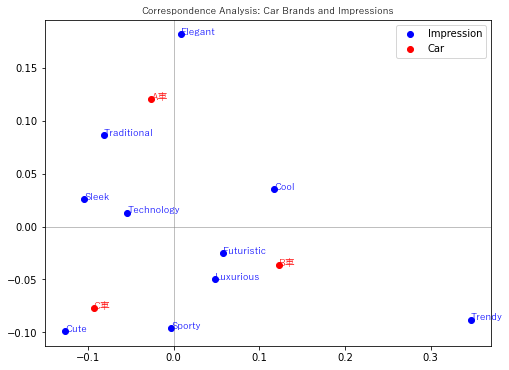

In [12]:
#=============================================  
# コレスポンデンス分析の実行準備
#============================================= 
ca = prince.CA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn'
)
#=============================================  
# 分析の実行
#============================================= 
ca = ca.fit(data_c)
#============================================= 
# 行（イメージワード）と列（車種）の座標を取得
#============================================= 
row_coords = ca.row_coordinates(data_c)
col_coords = ca.column_coordinates(data_c)


#============================================= 
# 日本語フォントを指定(私のPCの場合）
#============================================= 
font_path = r"C:\WINDOWS\Fonts\YuGothR.ttc"
prop = fm.FontProperties(fname=font_path)

#============================================= 
# プロットの準備（図のサイズ指定）
#============================================= 
fig, ax = plt.subplots(figsize=(8, 6))

#============================================= 
# 行（イメージワード）の散布図を青色で描画
#============================================= 
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Impression')
for i, txt in enumerate(row_coords.index):
    ax.annotate(
        txt,
        (row_coords.iloc[i, 0], row_coords.iloc[i, 1]),
        color='blue',
        fontproperties=prop
    )
#============================================= 
# 列（車種）の散布図を赤色で描画
#============================================= 
ax.scatter(col_coords[0], col_coords[1], color='red', label='Car')
for i, txt in enumerate(col_coords.index):
    ax.annotate(
        txt,
        (col_coords.iloc[i, 0], col_coords.iloc[i, 1]),
        color='red',
        fontproperties=prop
    )
#============================================= 
# x軸・y軸のゼロラインを灰色で描画
#============================================= 
ax.axhline(0, color='grey', linewidth=0.5)
ax.axvline(0, color='grey', linewidth=0.5)

#============================================= 
# タイトルもフォント指定
#============================================= 
ax.set_title(
    'Correspondence Analysis: Car Brands and Impressions',
    fontproperties=prop
)
# 凡例を表示
ax.legend()
# プロットを画面に表示

plt.show()

In [13]:
#============================================= 
# 車種と印象語のラベルに区別用の列を追加
#============================================= 
col_coords['type'] = 'Car'
row_coords['type'] = 'Impression'

#============================================= 
# 結合
#============================================= 
combined = pd.concat([col_coords, row_coords])

#============================================= 
# 出力
#============================================= 
combined.to_csv(output_dpath + "\\" + OUTPUT_AVE ,encoding='cp932')

# 結果を表示
print(combined)

                    0         1        type
A車          -0.026064  0.120612         Car
B車           0.122978 -0.036569         Car
C車          -0.093668 -0.077331         Car
Elegant      0.008277  0.181540  Impression
Luxurious    0.048551 -0.049733  Impression
Sporty      -0.002687 -0.095846  Impression
Technology  -0.054272  0.013023  Impression
Futuristic   0.057421 -0.025085  Impression
Traditional -0.082002  0.086514  Impression
Cute        -0.127012 -0.098651  Impression
Cool         0.117151  0.035045  Impression
Sleek       -0.104428  0.025646  Impression
Trendy       0.346978 -0.087957  Impression


In [14]:
#=============================================
# 保存フォルダ開く
#=============================================
os.startfile(os.path.realpath(output_dpath) + "\\")
#=============================================
# 保存したファイル開く
#=============================================
os.startfile(os.path.realpath(output_dpath) + "\\" + OUTPUT_AVE)
